<a href="https://colab.research.google.com/github/hale-in/WorldcupPrediction/blob/main/2022_World_Cup_Precitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting South Korea's probability to go to the tournament stage

## Background
머신러닝으로 문제를 해결하는 큰 흐름은 다음과 같습니다.

1. 문제 정의
    - 어떤 문제를 풀 것인지, 또는 어떤 궁금증을 해결하고 싶은지 최대한 명확하게 기술합니다. 
    - 예를 들어보겠습니다. “우리나라는 2022년에 월드컵에서 만족스러운 성적을 거둘 수 있을까?”, “우리나라가 2022년 월드컵에서 16강에 진출할 확률은 얼마나 될까?” 두 개의 문제 정의 중 더 적절한 것은 무엇일까요? 
    - 문제 해결 관점에서 “만족스러운 성적”은 주관적인 기준이기 때문에, 후자가 더 적절한 문제 정의입니다.

2. 데이터 수집
    - 문제를 해결하기 위해 관련된 데이터를 수집합니다. 

3. EDA
    - Exploratory Data Analysis의 약자입니다.

4. 데이터 전처리
    - 데이터 전처리는 수집한 데이터를 머신러닝 모델 학습에 알맞게 바꾸는 과정입니다.  
    - 수집한 데이터에는 노이즈가 있을 수 있습니다. 
    - 예를 들어, 텍스트 데이터라면 오타, 맞춤법 오류 등이 있을 수 있고, 수집 과정에서 실수로 인해 엉뚱한 데이터가 있을 수 있습니다. 
    - 노이즈가 있는 데이터는 머신러닝의 성능을 악화시킬 수 있으므로, 그 수를 최소화할 필요가 있습니다.

5. 모델 학습

6. 모델 평가

7. 모델 조정

8. 최종 결과 산출

## 1. 문제 정의

## 2. 데이터 수집
데이터 수집 과정은 상단에서서 설명한 모든 과정에서 가장 오래 걸리고 반복적인 과정이라고 할 수 있습니다. 

Kaggle, 데이콘, 통계청 등 데이터셋을 공개해주는 플랫폼에서 데이터를 가져와서 사용한다면, 데이터 수집 비용을 줄일 수 있습니다.
한 가지 단점은 풀려고 하는 문제가 ()한 문제일 수록, 직접적인 데이터셋을 찾는 건 힘들 수도 있다는 점입니다.

월드컵 관련 데이터의 경우, 과거에 여러 번 연구가 진행된 적이 있고, 사람들의 관심도 많이 받는 편이라서 데이터를 구하기가 비교적 수월했습니다.


Kaggle API를 사용해서 데이터셋을 다운 받아오겠습니다.

https://www.kaggle.com/general/74235

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"scottsuk0306","key":"cc9f18d735fa9903442453bdc265e72c"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


**brenda89/fifa-world-cup-2022**

- 1993년부터 2022년 6월까지 있었던 모든 국제 경기를 모은 데이터셋입니다. 

In [ ]:
!kaggle datasets download brenda89/fifa-world-cup-2022

  0% 0.00/611k [00:00<?, ?B/s]
100% 611k/611k [00:00<00:00, 83.0MB/s]


In [ ]:
!unzip fifa-world-cup-2022.zip

Archive:  fifa-world-cup-2022.zip
  inflating: international_matches.csv  



**2022-fifa-worldcup-qatar-full-live-dataset**

- FIFA 2022 게임 내 선수 능력치, 연봉, 포지션 등 선수 데이터셋과 카타르 2022년 팀 스쿼드 데이터셋입니다.

In [ ]:
!kaggle datasets download muhammad4hmed/2022-fifa-worldcup-qatar-full-live-dataset

  0% 0.00/2.08M [00:00<?, ?B/s]
100% 2.08M/2.08M [00:00<00:00, 136MB/s]


In [ ]:
!unzip 2022-fifa-worldcup-qatar-full-live-dataset.zip

Archive:  2022-fifa-worldcup-qatar-full-live-dataset.zip
  inflating: 2022_Squad (Updates every week)/Argentina.csv  
  inflating: 2022_Squad (Updates every week)/Australia.csv  
  inflating: 2022_Squad (Updates every week)/Belgium.csv  
  inflating: 2022_Squad (Updates every week)/Brazil.csv  
  inflating: 2022_Squad (Updates every week)/Cameroon.csv  
  inflating: 2022_Squad (Updates every week)/Canada.csv  
  inflating: 2022_Squad (Updates every week)/Costa-Rica.csv  
  inflating: 2022_Squad (Updates every week)/Croatia.csv  
  inflating: 2022_Squad (Updates every week)/Denmark.csv  
  inflating: 2022_Squad (Updates every week)/Ecuador.csv  
  inflating: 2022_Squad (Updates every week)/England.csv  
  inflating: 2022_Squad (Updates every week)/France.csv  
  inflating: 2022_Squad (Updates every week)/Germany.csv  
  inflating: 2022_Squad (Updates every week)/Ghana.csv  
  inflating: 2022_Squad (Updates every week)/IR Iran.csv  
  inflating: 2022_Squad (Updates every week)/IR-Iran.cs

In [ ]:
!kaggle datasets list -s "Qatar 2022"

ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
amineteffal/qatar2022worldcupschudule                     Qatar 2022 Football World Cup                       8KB  2022-06-20 09:25:05            501         22  1.0              
muhammad4hmed/2022-fifa-worldcup-qatar-full-live-dataset  2022 FIFA Worldcup Qatar FULL LIVE DATASET          2MB  2022-10-08 13:52:19            172         19  1.0              
brenda89/fifa-world-cup-2022                              FIFA World Cup 2022 ⚽️🏆                           611KB  2022-08-28 11:38:08           2755         79  1.0              
evangower/fifa-world-cup                                  FIFA World Cup                            


**amineteffal/qatar2022worldcupschudule**

- 2022년 카타르 월드컵 일정 및 조 데이터 셋입니다.



In [ ]:
!kaggle datasets download amineteffal/qatar2022worldcupschudule 

  0% 0.00/7.92k [00:00<?, ?B/s]
100% 7.92k/7.92k [00:00<00:00, 4.82MB/s]


In [ ]:
!unzip qatar2022worldcupschudule.zip

Archive:  qatar2022worldcupschudule.zip
  inflating: Qatar2022-teams.csv     
  inflating: historical_win-loose-draw_ratios_qatar2022_teams.csv  
  inflating: matchs-schudule.csv     



**cashncarry/fifaworldranking**

- 2022년 8월 25일까지 업데이트된 피파 랭킹 데이터셋입니다.



In [ ]:
!kaggle datasets download cashncarry/fifaworldranking 

  0% 0.00/530k [00:00<?, ?B/s]
100% 530k/530k [00:00<00:00, 84.6MB/s]


In [ ]:
!unzip fifaworldranking.zip

Archive:  fifaworldranking.zip
  inflating: fifa_ranking-2022-10-06.csv  


In [ ]:
!kaggle datasets list -s "International Football"

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
martj42/international-football-results-from-1872-to-2017         International football results from 1872 to 2022   572KB  2022-09-29 06:32:20          55071       1514  1.0              
martj42/womens-international-football-results                    Women's International Football Results              62KB  2022-08-01 00:21:57           1875         62  1.0              
eng0mohamed0nabil/international-football-results                 International football results                     534KB  2020-08-05 14:17:54            235          8  1.0              
hugomathien/soccer                                          

In [ ]:
!kaggle datasets download martj42/international-football-results-from-1872-to-2017

  0% 0.00/572k [00:00<?, ?B/s]
100% 572k/572k [00:00<00:00, 23.4MB/s]


In [ ]:
!unzip international-football-results-from-1872-to-2017.zip

Archive:  international-football-results-from-1872-to-2017.zip
  inflating: results.csv             
  inflating: shootouts.csv           


## 3. EDA

Python의의 Pandas 라이브러리를 사용했습니다.

- `match_df`: 국제 경기 데이터셋
- `rank_df`: 피파 랭킹 데이터셋
- `worldcup_match_df`: 카타르 월드컵 일정 데이터셋
- `teams_df`: 카타르 월드컵 참여하는 팀 - 조 데이터셋
- `players_df`: FIFA 2022 선수 데이터셋




In [ ]:
import pandas as pd

match_df = pd.read_csv("./international_matches.csv")
rank_df = pd.read_csv("./fifa_ranking-2022-10-06.csv")
worldcup_match_df = pd.read_csv("./matchs-schudule.csv", sep=";")
teams_df = pd.read_csv("./Qatar2022-teams.csv", sep=";")
players_df = pd.read_csv("./Players_Data_2022/FIFA22_official_data.csv")
recent_match_df = pd.read_csv("./results.csv")

match_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
recent_match_df['date'].unique()[-5:-1]

array(['2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27'],
      dtype=object)

In [ ]:
teams_df.head()

,Team,Group
0,Senegal,A
1,Qatar,A
2,Netherlands,A
3,Ecuador,A
4,Iran,B


In [ ]:
rank_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


## 4. 데이터 전처리

위에서 여러 개의 데이터셋을 불러오는데, 나라 이름이 통일되지 않은 것들이 있어 2022 카타르 월드컵 참가 팀 중 이름이 다른 팀을 한 가지로 통일해주었습니다.

In [ ]:
match_df = match_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})

In [ ]:
rank_df = rank_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})

In [ ]:
match_df['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

In [ ]:
match_df['rank_difference'] = match_df['home_team_fifa_rank'] - match_df['away_team_fifa_rank']
match_df['average_rank'] = (match_df['home_team_fifa_rank'] + match_df['away_team_fifa_rank'])/2
match_df['point_difference'] = match_df['home_team_total_fifa_points'] - match_df['away_team_total_fifa_points']
match_df['score_difference'] = match_df['home_team_score'] - match_df['away_team_score']
match_df['is_won'] = match_df['score_difference'] > 0 # Take draw as lost
match_df['is_stake'] = match_df['tournament'] != 'Friendly'

match_df['is_worldcup'] = 'FIFA World Cup' in match_df['tournament']

In [ ]:
match_df['rank_change'] = 0

from datetime import date
from tqdm.auto import tqdm

cnt = 0

match_df['home_rank_change'] = 0
match_df['away_rank_change'] = 0
match_df['rank_change_diff'] = 0

# 홈 팀의 상승세 > 어웨이 팀의 상승세

for i, row in tqdm(match_df.iterrows(), total=len(match_df)):
    match_date = row['date']
    home = row['home_team']
    away = row['away_team']
    date = date.fromisoformat(match_date)

    home_rank_df = rank_df.loc[rank_df.country_full == home]
    # print(home_rank_df.head())
    mini = 0
    target_rank_change = 0
    for j, row2 in home_rank_df.iterrows():
        rank_date = row2['rank_date']
        # print(rank_date)
        rank_date = date.fromisoformat(rank_date)
        diff = rank_date - date
        mini = min(abs(diff.days), mini)

        if mini == abs(diff.days):
            target_rank_change = row2['rank_change']

    match_df.home_rank_change.iloc[i] = target_rank_change


    away_rank_df = rank_df.loc[rank_df.country_full == away]
    # print(home_rank_df.head())
    mini = 0
    target_rank_change = 0
    for j, row2 in home_rank_df.iterrows():
        rank_date = row2['rank_date']
        # print(rank_date)
        rank_date = date.fromisoformat(rank_date)
        diff = rank_date - date
        mini = min(abs(diff.days), mini)

        if mini == abs(diff.days):
            target_rank_change = row2['rank_change']
        
    match_df.away_rank_change.iloc[i] = target_rank_change

    #print(type(match_date))
    # cnt += 1
    # if cnt == 10:
    #     break

  0%|          | 0/23921 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
print("home_rank_change: ", match_df.home_rank_change.unique())
print("away_rank_change: ", match_df.away_rank_change.unique())

home_rank_change:  [-28   5 -30   2  -1  -8  -4   0   1  -2 -15  -3   4   3 -11  -7  -6  10
 -10 -13   8   6   7   9  -9  -5 -16  12 -26 -12  14  15 -38 -14  13 -17
  22  20  17]
away_rank_change:  [-28   5 -30   2  -1  -8  -4   0   1  -2 -15  -3   4   3 -11  -7  -6  10
 -10 -13   8   6   7   9  -9  -5 -16  12 -26 -12  14  15 -38 -14  13 -17
  22  20  17]


In [ ]:
match_df['rank_change_diff'] = match_df['home_rank_change'] - match_df['away_rank_change']

match_df['is_home_pos'] = match_df['home_rank_change'] > 0
match_df['is_away_pos'] = match_df['away_rank_change'] > 0

In [ ]:
match_df.to_csv("./match_df_modified.csv")

In [ ]:
from datetime import date
from tqdm.auto import tqdm

cnt = 0

match_df['home_recent_wins'] = 0
match_df['away_recent_wins'] = 0


for i, row in tqdm(match_df.iterrows(), total=len(match_df)):
    match_date = row['date']
    home = row['home_team']
    away = row['away_team']
    date = date.fromisoformat(match_date)

    home_match_df = match_df.loc[(match_df.home_team == home)].reset_index()
    away_match_df = match_df.loc[(match_df.away_team == away)].reset_index()

    for j, row2 in home_match_df.iterrows():
        # print(row2.columns)
        if row2['date'] != match_date:
            continue
        
        start = max(0, j-10)
        end = max(0, j)
        recent_matches = home_match_df.iloc[start:end]
        result_list = recent_matches.is_won.value_counts()
        if len(result_list) > 1:
            match_df.home_recent_wins.iloc[i] = result_list[1]
        break
    
    for j, row3 in away_match_df.iterrows():
        # print(row2.columns)
        if row3['date'] != match_date:
            continue
        
        start = max(0, j-5)
        end = max(0, j-1)
        recent_matches = away_match_df.iloc[start:end]
        result_list = recent_matches.is_won.value_counts()
        if len(result_list) > 1:
            match_df.away_recent_wins.iloc[i] = result_list[0]
        break
    
    # #print(type(match_date))
    # cnt += 1
    # if cnt == 5:
    #     break

  0%|          | 0/23921 [00:00<?, ?it/s]

In [ ]:
from datetime import date
from tqdm import tqdm

cnt = 0

import copy

# match_df_2 = copy.deepcopy(match_df)

country = "South Korea"

# print(match_df.loc[(match_df.home_team == country)].iloc[-6:-1]['is_won'].value_counts()[True])
# print(match_df.loc[(match_df.away_team == country)].iloc[-6:-1]['is_won'].value_counts()[True])

#     match_df.loc[(match_df.home_team == country) | (match_df.away_team == country)]

match_df.loc[(match_df.home_team == country)].iloc[-1]


date                              2022-06-14
home_team                        South Korea
away_team                              Egypt
home_team_continent                     Asia
away_team_continent                   Africa
home_team_fifa_rank                       29
away_team_fifa_rank                       32
home_team_total_fifa_points             1519
away_team_total_fifa_points             1500
home_team_score                            4
away_team_score                            1
tournament                          Friendly
city                                   Seoul
country                          South Korea
neutral_location                       False
shoot_out                                 No
home_team_result                         Win
home_team_goalkeeper_score              75.0
away_team_goalkeeper_score               NaN
home_team_mean_defense_score            73.0
home_team_mean_offense_score            80.0
home_team_mean_midfield_score           73.8
away_team_

## 5. 모델 학습

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
match_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,is_stake,is_worldcup,rank_change,home_rank_change,away_rank_change,rank_change_diff,is_home_pos,is_away_pos,home_recent_wins,away_recent_wins
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,True,False,0,-28,-28,0,False,False,0,0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,False,False,0,5,5,0,True,True,0,0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,True,False,0,-30,-30,0,False,False,0,0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,False,False,0,2,2,0,True,True,0,0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,True,False,0,-1,-1,0,False,False,0,0


In [ ]:
X, y = match_df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake', 'is_worldcup', 'is_home_pos', 'is_away_pos', 'home_recent_wins', 'away_recent_wins']], match_df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 1.0, 'Performance on the Training set')

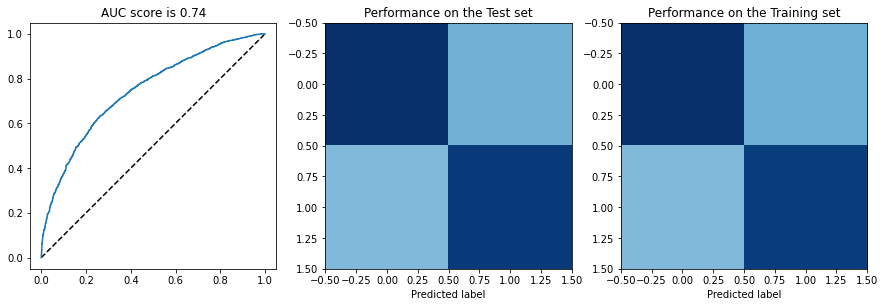

In [ ]:
from matplotlib import pyplot as plt

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')

## 6. 모델 평가

In [ ]:
# let's define a small margin when we safer to predict draw then win
margin = 0.05

# let's define the rankings at the time of the World Cup

rank_df = rank_df.loc[(rank_df['rank_date'] == rank_df['rank_date'].max()) & 
                                    (rank_df['country_full'].isin(teams_df['Team'].unique()))]

world_cup_rankings = rank_df.set_index(['country_full'])

In [ ]:
world_cup_rankings.index.unique()

Index(['Brazil', 'South Korea', 'Tunisia', 'Costa Rica', 'Australia', 'Canada',
       'Cameroon', 'Ecuador', 'Poland', 'Japan', 'Belgium', 'Argentina',
       'France', 'England', 'Spain', 'Netherlands', 'Portugal', 'Denmark',
       'Germany', 'Croatia', 'Mexico', 'Uruguay', 'Switzerland', 'USA',
       'Senegal', 'Wales', 'Iran', 'Serbia', 'Morocco', 'Qatar',
       'Saudi Arabia', 'Ghana'],
      dtype='object', name='country_full')

In [ ]:
rank_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
63809,1,Brazil,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06
63811,28,South Korea,KOR,1530.30,1526.02,0,AFC,2022-10-06
63813,30,Tunisia,TUN,1507.54,1507.86,0,CAF,2022-10-06
63814,31,Costa Rica,CRC,1503.59,1500.06,-3,CONCACAF,2022-10-06
63822,38,Australia,AUS,1488.72,1483.73,-1,AFC,2022-10-06


In [ ]:
 # current_ranks_df = rank_df.loc[rank_df.rank_date == "2022-10-06"].set_index(['country_full'])

In [ ]:
from itertools import combinations
import numpy as np

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup = teams_df.set_index(['Team'])
world_cup['points'] = 0
world_cup['total_prob'] = 0
world_cup['expected points'] = 0
world_cup['rank'] = None

country_win_prob = {}

for country in teams_df['Team'].unique():
    country_win_prob[country] = list()

korea_win_prob = []

for group in set(teams_df['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(teams_df.query('Group == "{}"'.format(group)).values, 2):
        print("{} vs. {}: ".format(home[0], away[0]), end='')

        home = home[0]
        away = away[0]
        
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True, True, True, True, np.nan, np.nan]]), columns=X_test.columns)
        
        if away != "South Korea":
            home_rank = world_cup_rankings.loc[home, 'rank']
            home_points = world_cup_rankings.loc[home, 'total_points']
            opp_rank = world_cup_rankings.loc[away, 'rank']
            opp_points = world_cup_rankings.loc[away, 'total_points']
            is_home_pos = world_cup_rankings.loc[home, 'rank_change'] > 0
            is_away_pos = world_cup_rankings.loc[away, 'rank_change'] > 0
            world_cup.loc[home, 'rank'] = home_rank
            world_cup.loc[away, 'rank'] = opp_rank
            home_recent_wins = match_df.loc[(match_df.home_team == home)].iloc[-1]['home_recent_wins']
            away_recent_wins = match_df.loc[(match_df.home_team == away)].iloc[-1]['home_recent_wins']

        elif away == "South Korea":
            home_rank = world_cup_rankings.loc[away, 'rank']
            home_points = world_cup_rankings.loc[away, 'total_points']
            opp_rank = world_cup_rankings.loc[home, 'rank']
            opp_points = world_cup_rankings.loc[home, 'total_points']
            is_away_pos = world_cup_rankings.loc[home, 'rank_change'] > 0
            is_home_pos = world_cup_rankings.loc[away, 'rank_change'] > 0
            world_cup.loc[away, 'rank'] = home_rank
            world_cup.loc[home, 'rank'] = opp_rank
            home_recent_wins = match_df.loc[(match_df.home_team == away)].iloc[-1]['home_recent_wins']
            away_recent_wins = match_df.loc[(match_df.home_team == home)].iloc[-1]['home_recent_wins']
            away = home
            home = "South Korea"

        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        row['is_home_pos'] = is_home_pos
        row['is_away_pos'] = is_away_pos
        row['home_recent_wins'] = home_recent_wins
        row['away_recent_wins'] = away_recent_wins 
        
        home_win_prob = model.predict_proba(row)[:,1][0]
        # print("Probability: ", home_win_prob)
        
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob

        country_win_prob[home].append(home_win_prob)
        country_win_prob[away].append(1-home_win_prob)
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
            world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            world_cup.loc[home, 'expected points'] += home_win_prob * 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1
            world_cup.loc[home, 'expected points'] += home_win_prob * 1
            world_cup.loc[away, 'expected points'] += (1-home_win_prob) * 1
        
        if home == "South Korea":
            korea_win_prob.append((away, home_win_prob))

___Starting group D:___
Denmark vs. Tunisia: Denmark wins with 0.60
Denmark vs. France: France wins with 0.56
Denmark vs. Australia: Denmark wins with 0.63
Tunisia vs. France: France wins with 0.70
Tunisia vs. Australia: Draw
France vs. Australia: France wins with 0.66
___Starting group B:___
Iran vs. England: England wins with 0.65
Iran vs. USA: USA wins with 0.58
Iran vs. Wales: Draw
England vs. USA: England wins with 0.56
England vs. Wales: England wins with 0.57
USA vs. Wales: Draw
___Starting group G:___
Switzerland vs. Cameroon: Switzerland wins with 0.62
Switzerland vs. Brazil: Brazil wins with 0.63
Switzerland vs. Serbia: Draw
Cameroon vs. Brazil: Brazil wins with 0.81
Cameroon vs. Serbia: Serbia wins with 0.66
Brazil vs. Serbia: Brazil wins with 0.63
___Starting group C:___
Argentina vs. Saudi Arabia: Argentina wins with 0.75
Argentina vs. Mexico: Argentina wins with 0.56
Argentina vs. Poland: Argentina wins with 0.63
Saudi Arabia vs. Mexico: Mexico wins with 0.75
Saudi Arabia

In [ ]:
for group in set(teams_df['Group']):
    print('___Starting group {}:___'.format(group))
    teams = teams_df.query('Group == "{}"'.format(group)).values
    for team_info in teams:
        team_name = team_info[0]
        print(team_name, ": ", world_cup.loc[team_name, "expected points"])

___Starting group D:___
Denmark :  3.683836633618955
Tunisia :  0.49262584176399643
France :  5.7914942948986
Australia :  0.5073741582360036
___Starting group B:___
Iran :  0.46786294596094097
England :  5.334567046403215
USA :  2.233308254402498
Wales :  1.0288567946675686
___Starting group G:___
Switzerland :  2.364041368656602
Cameroon :  0.0
Brazil :  6.224753903062239
Serbia :  2.4755605340510165
___Starting group C:___
Argentina :  5.820694990252443
Saudi Arabia :  0.0
Mexico :  2.789683052766581
Poland :  2.571562950048531
___Starting group F:___
Morocco :  1.7214507574864943
Croatia :  3.6090445695010134
Belgium :  5.942505428558924
Canada :  0.0
___Starting group H:___
Uruguay :  4.34455858201
South Korea :  1.8969756535238165
Portugal :  4.7849302334458095
Ghana :  0.0
___Starting group E:___
Germany :  2.7575727612317875
Japan :  0.9564601213306931
Spain :  4.308493719124598
Costa Rica :  0.4941291839089408
___Starting group A:___
Senegal :  3.769552036713709
Qatar :  0.0
N

In [ ]:
korea_win_prob

total_prob = 0

temp = 1
for i in range(3):
    temp = temp * korea_win_prob[i][1]

total_prob += temp

for i in range(3):
    temp = 1
    for j in range(3):
        if i == j:
            temp = temp * (1 - korea_win_prob[i][1])
        else:
            temp = temp * korea_win_prob[i][1]
    total_prob += temp

print(total_prob)

0.3949488599110874


In [ ]:
for country in country_win_prob.keys():

    win_prob_list = country_win_prob[country]

    total_prob = 0
    temp = 1
    for i in range(3):
        temp = temp * win_prob_list[i]

    total_prob += temp

    for i in range(3):
        temp = 1
        for j in range(3):
            if i == j:
                temp = temp * (1 - win_prob_list[i])
            else:
                temp = temp * win_prob_list[i]
        total_prob += temp
    
    print(country, ":", total_prob)


Senegal : 0.5440669037946991
Qatar : 0.2544731208380636
Netherlands : 0.7392789969996261
Ecuador : 0.3844176146521746
Iran : 0.3689376500106172
England : 0.632075424083061
USA : 0.5044058676775469
Wales : 0.4749208657950559
Argentina : 0.6888716404418642
Saudi Arabia : 0.1729113877188884
Mexico : 0.5612121900113971
Poland : 0.4690090648518923
Denmark : 0.562554843481941
Tunisia : 0.34095470085338353
France : 0.6963984597970122
Australia : 0.35051501390912515
Germany : 0.5360727566628274
Japan : 0.4032303183668911
Spain : 0.6432595863606345
Costa Rica : 0.39474565359881675
Morocco : 0.37517899260093723
Croatia : 0.5381133402213696
Belgium : 0.7216208864088002
Canada : 0.30962116472685414
Switzerland : 0.4760002607244377
Cameroon : 0.21852289730782354
Brazil : 0.7412390918450229
Serbia : 0.4750956449511845
Uruguay : 0.5949875943498474
South Korea : 0.3949488599110874
Portugal : 0.6972050864661004
Ghana : 0.231078413830103


In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

68.36

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

68.19

In [ ]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

62.72

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gnb_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

67.25

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

58.77

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

65.04

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

68.13

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

59.73

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


40.96

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,68.36
0,Support Vector Machines,68.19
6,Stochastic Gradient Decent,68.13
4,Naive Bayes,67.25
3,Random Forest,65.04
1,KNN,62.72
5,Perceptron,59.73
8,Decision Tree,58.77
7,Linear SVC,40.96


In [ ]:
gnb_pred
lg_pred
svm_pred

final_pred = []

for i in range(len(svm_pred)):
    x = int(gnb_pred[i] == True)
    y = int(lg_pred[i] == True)
    z = int(svm_pred[i] == True)

    if x+y+z > 1:
        final_pred.append(True)
    else:
        final_pred.append(False)

y_test = y_test.tolist()

# 앙상블 최종 결과

In [ ]:
sum(1 for x,y in zip(y_test,final_pred) if x == y) / len(y_test)


0.6833855799373041

In [ ]:
world_cup.head()

,Group,points,total_prob,expected points,rank
Team,,,,,
Senegal,A,6,1.652717,3.769552,18
Qatar,A,0,0.995105,0.000000,50
Netherlands,A,9,2.044719,6.134157,8
Ecuador,A,3,1.307459,1.756172,44
Iran,B,1,1.241503,0.467863,20


In [ ]:
world_cup.head(30)

,Group,points,total_prob,expected points,rank
Team,,,,,
Senegal,A,6,1.652717,3.769552,18
Qatar,A,0,0.995105,0.000000,50
Netherlands,A,9,2.044719,6.134157,8
Ecuador,A,3,1.307459,1.756172,44
Iran,B,1,1.241503,0.467863,20
England,B,9,1.778189,5.334567,5
USA,B,4,1.522837,2.233308,16
Wales,B,2,1.457470,1.028857,19
Argentina,C,9,1.940232,5.820695,3


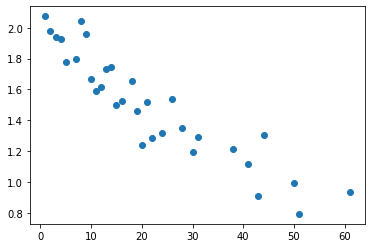

In [ ]:
plt.figure()
plt.scatter(world_cup['rank'], world_cup['total_prob'])
plt.show()

1. Feature Extraction (4개) 다른 게 더 있는지?
    - 1993년부터 사용하는 게 맞을까? 2002년부터는 어떨까?
    - **선수들 연봉 총합, 상위 몇 명 가져오기** (1993년 ~ 그 때 연봉 총합 정보가 있어야 함, 기한을 줄이는 것 가능, 데이터를 구하는 건 어려울 듯)
    - (Optional) 인구 수, GDP
    - **배당률** (1993년부터 모든 경기 배당률 찾을 수 있을까?)
    - FIFA 게임 내 선수 능력치
    - 감독 연임 기간 (1년: 1점, 2년 이상: 2점 이런 식으로)
    - 상대 전적 데이터 있음 
    - **최근 5경기 몇 승 했는지**
    - **피파 랭킹 변화량**

    < 월드컵 관련 데이터 활용>
    - 전 월드컵 성적
    - 월드컵 예선 경기를 활용하는 건 어떤지?
    - 0, 1, 2 (예시, 0:Friendly, 1: World Cup 예선, 2: World Cup 본선)
    - is_stake, is_worldcup

---

2. Logistic Regression 만 사용하는데 다른 모델을 더 사용해서 Ensemble

3. 6월 국제 경기까지만 반영, 그 이후 경기들도 가져와서 이 모델의 성능을 측정하는 것

4. 결과값을 시각화하는 코드 (코드가 아니더라도 어떤 모양일지)

---

10월 6일까지 연봉 총합, 배당률 사용가능한지 알아보기 -> **불가능**

가능하면 쓰고 불가능하면 최근 5경기, 피파 랭킹 변화량 사용

# 16강 진출 계산하는 아이디어

1. 승점의 기댓값 계산 (확률로 나오지는 않음)
2. 모든 경우의 수 계산
   
   2-1. 2승 1패, 3승, 2승 1무 이런 식으로 계산 (2승 1패면 0.8 곱하기, 1승 2무는 0.5 곱하기)

   2-2. 모든 경우의 수 계산 (2-1 확장)


2번 부가 설명
4C2로 총 6번의 경기가 있게 되는데, 각 경기마다 홈 팀 승리 / 홈 팀 패배 / 홈 팀 무승부의 3가지 경우의 수가 있습니다.

따라서 전체 경우의 수는 3^6 = 729가지입니다.

전체 경우의 수 중에서 한국이 조 1위, 조 2위를 하는 경우가 있을 것입니다. (승점으로 계산하면 됩니다.) 이를 계산하면 됩니다.

일단 한국이 16강에 진출할 확률을 0으로 초기화해봅시다.

예를 들어, 한국이 3전 전승을 한 경우를 생각해봅시다.

3번의 경기가 모두 독립 사건이라고 가정하면, 머신러닝을 통해 계산한 경기 승리할 확률을 모두 곱하면 3전 전승할 확률이 나오게 됩니다.

(예시: 우루과이 전 승리할 확률 * 포르투갈 전 승리할 확률 * 가나 전 승리할 확률)

또 예시를 하나 더 생각해봅시다. 한국이 우루과이, 가나 전에서 2승, 포르투갈 전에서 1패를 했다고 해봅시다. 머신러닝을 통해 기 승/패 확률을 구해 모두 곱하면 해당 상황이 일어날 확률이 나오게 됩니다.

이 상황은 한국이 포르투갈 전에서 패배하긴 했지만, 승점 6점으로 16강에 진출할 수 있을 것입니다. 따라서 이 확률도 한국이 16강의 진출할 확률에 더해질 수 있습니다. 

한국이 조 1위, 조 2위 하는 경우를 모두 찾아서 그에 해당하는 확률을 곱셈법칙을 통해 구하고, 확률을 모두 합하면 한국이 16강에 진출할 확률이 계산됩니다.

다만, 이 방법의 한계점은 승점이 같을 때 득실차를 고려하지는 못하기 때문에 이 부분에 대한 대처가 필요합니다. (예를 들어, 승점이 같을 때는 무조건 한국이 순위가 앞선다고 가정하는 것)

---

729가지 경우를 모두 계산해서
승점을 모두 계산하고
그 승점을 기준으로 조1위, 조2위 경우의 수



## 7. 모델 조정